# Question 1


## Part (a)

Epoch 1/20: 100%|██████████| 1000/1000 [00:09<00:00, 100.98it/s, loss=0.977]


Iteration 0, average loss = 0.9768735107779503


Epoch 2/20: 100%|██████████| 1000/1000 [00:10<00:00, 96.42it/s, loss=0.949]


Iteration 1, average loss = 0.9489081398248672


Epoch 3/20: 100%|██████████| 1000/1000 [00:09<00:00, 107.23it/s, loss=0.934]


Iteration 2, average loss = 0.9337427690625191


Epoch 4/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.81it/s, loss=0.924]


Iteration 3, average loss = 0.9237970331311226


Epoch 5/20: 100%|██████████| 1000/1000 [00:08<00:00, 114.38it/s, loss=0.917]


Iteration 4, average loss = 0.9165438867807388


Epoch 6/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.69it/s, loss=0.911]


Iteration 5, average loss = 0.9108829268813133


Epoch 7/20: 100%|██████████| 1000/1000 [00:08<00:00, 113.56it/s, loss=0.906]


Iteration 6, average loss = 0.9062502483725547


Epoch 8/20: 100%|██████████| 1000/1000 [00:08<00:00, 115.99it/s, loss=0.902]


Iteration 7, average loss = 0.9023283321261406


Epoch 9/20: 100%|██████████| 1000/1000 [00:13<00:00, 75.32it/s, loss=0.899]


Iteration 8, average loss = 0.8989271869659424


Epoch 10/20: 100%|██████████| 1000/1000 [00:08<00:00, 119.81it/s, loss=0.896]


Iteration 9, average loss = 0.8959252513051033


Epoch 11/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.61it/s, loss=0.893]


Iteration 10, average loss = 0.8932374778985978


Epoch 12/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.42it/s, loss=0.891]


Iteration 11, average loss = 0.8908050414323807


Epoch 13/20: 100%|██████████| 1000/1000 [00:08<00:00, 115.77it/s, loss=0.889]


Iteration 12, average loss = 0.8885848648548126


Epoch 14/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.86it/s, loss=0.887]


Iteration 13, average loss = 0.8865407827496529


Epoch 15/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.10it/s, loss=0.885]


Iteration 14, average loss = 0.8846492577195167


Epoch 16/20: 100%|██████████| 1000/1000 [00:08<00:00, 114.67it/s, loss=0.883]


Iteration 15, average loss = 0.8828856172561645


Epoch 17/20: 100%|██████████| 1000/1000 [00:08<00:00, 119.26it/s, loss=0.881]


Iteration 16, average loss = 0.8812392461299896


Epoch 18/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.95it/s, loss=0.88]


Iteration 17, average loss = 0.8796923191547393


Epoch 19/20: 100%|██████████| 1000/1000 [00:08<00:00, 116.39it/s, loss=0.878]


Iteration 18, average loss = 0.8782335023283958


Epoch 20/20: 100%|██████████| 1000/1000 [00:08<00:00, 117.82it/s, loss=0.877]


Iteration 19, average loss = 0.8768514419794082


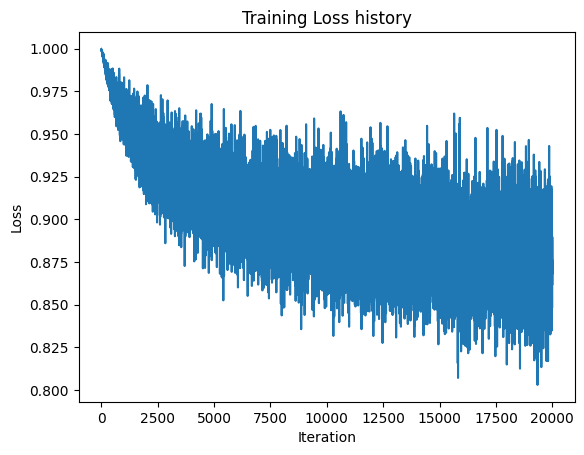

Training accuracy = 35.482
Test accuracy = 35.39


In [4]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm

# 1. Dataloading
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 50

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define network parameters

Din = 3*32*32 #Input size (flattened image)
K = 10
std = 1e-5

#Initialize weights and biases

w = torch.randn(Din, K, dtype=torch.float32)*std
b = torch.zeros(K)

#Hyperparameters
iterations = 20
learning_rate = 2e-6
learning_rate_decay = 0.9
reg = 0
loss_history = []

# 3. Training
for t in range(iterations):
    running_loss = 0.0
    # Add tqdm progress bar
    with tqdm(enumerate(trainloader, 0), total=len(trainloader), desc=f"Epoch {t+1}/{iterations}") as pbar:
        for i, data in pbar:
            inputs, labels = data
            Ntr = inputs.shape[0]
            x_train = inputs.view(Ntr, -1)
            y_train_onehot = nn.functional.one_hot(labels, K).float()

            # Forward pass
            y_pred = x_train.mm(w) + b

            # Compute loss
            loss = (1/Ntr)*torch.sum((y_pred - y_train_onehot)**2) + reg*(torch.sum(w**2))
            loss_history.append(loss.item())
            running_loss += loss.item()

            # Backpropagation
            dy_pred = 2.0/Ntr * (y_pred - y_train_onehot)
            dw = x_train.t().mm(dy_pred) + reg * w
            db = dy_pred.sum(dim=0)

            # Update weights
            w -= learning_rate * dw
            b -= learning_rate * db

            # Update the progress bar description with the current loss
            pbar.set_postfix(loss=running_loss/(i+1))

    # Print loss for every epoch
    print(f"Iteration {t}, average loss = {running_loss/len(trainloader)}")
# 4. Plot loss
plt.plot(loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss history')
plt.show()

# 5. Calculate Accuracy on training set
correct_train = 0
total_train = 0

with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()

        y_pred = x_train.mm(w) + b
        _, predicted = torch.max(y_pred, 1)
        _, actual = torch.max(y_train_onehot, 1)
        total_train += labels.size(0)
        correct_train += (predicted == actual).sum().item()

train_accuracy = 100 * correct_train / total_train
print(f"Training accuracy = {train_accuracy}")

# 6. Calculate Accuracy on test set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()

        y_pred = x_test.mm(w) + b
        _, predicted = torch.max(y_pred, 1)
        _, actual = torch.max(y_test_onehot, 1)
        total_test += labels.size(0)
        correct_test += (predicted == actual).sum().item()

test_accuracy = 100 * correct_test / total_test
print(f"Test accuracy = {test_accuracy}")    

In [3]:
y_pred[0]

NameError: name 'y_pred' is not defined

In [7]:
y_train_onehot[0]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [2]:
y_pred[0]

NameError: name 'y_pred' is not defined